## 正しい計算

ローテーションパラメータを $\lambda$ とすると、 $k$ 回目の試行における最大ローテーションカウントは $$n_k = \left\lfloor \lambda^{k-1} \right\rfloor$$ である。また、 $m$ 回の振幅増幅を行ったときの受容確率は $$p_m = \sin^2\left( \left( 2 m + 1\right) \theta \right)$$ である。 $k$ 回目の試行では $0,\ldots,n_k$ の整数から一様に選ばれた $m$ により $m$ 回の振幅増幅を行うので、 $k$ 回目の試行で棄却される確率は $$q_k = 1 - \frac{1}{n_k + 1}\sum_{m = 0}^{n_k} p_m$$ と表せる。これらを用いると、受容されるまでに必要なオラクル呼び出しの総数の期待値は以下のように計算される。 $$S = \lim_{K \to \infty} \sum_{k = 1}^{K} \sum_{m = 0}^{n_k} \frac{m}{n_k + 1} \left(\prod_{j=1}^{k-1} q_j\right) p_m = \lim_{K \to \infty} \sum_{k = 1}^{K} \frac{1}{n_k + 1} \left(\prod_{j=1}^{k-1} q_j\right) \left(\sum_{m = 0}^{n_k} m p_m\right)$$ それぞれの値を順番に計算することにより、この無限級数の有限近似を $O(n_K) = O(\lambda^K)$ で行うことができる。


In [11]:
import numpy as np

# complexity: O(lambd ** K)
def calc(P, K=70, lambd=6/5):

    theta = np.arcsin(np.sqrt(P))

    n = np.array([np.floor(lambd ** i) for i in range(K)], dtype=int)
    p = np.sin( (2 * np.arange(n[-1] + 1) + 1) * theta ) ** 2
    q = 1 - np.cumsum(p)[n] / (n + 1)

    failure = np.concatenate([[1.0], np.cumprod(q)])[:-1]
    weighted_m = np.cumsum(p * np.arange(n[-1] + 1))
    s = np.sum(weighted_m[n] * failure / (n + 1))

    n_opt = .5 * np.arccos(np.sqrt(P)) / np.arcsin(np.sqrt(P))

    return s, n_opt


[2.30009683 2.30010449 2.30012044 2.30012826 2.30014791 2.30015702
 2.30018142 2.30019301 2.300223   2.30023792 2.30027397 2.3002929
 2.30033536 2.300359   2.30040854 2.30043863 2.3004977  2.3005383
 2.30061146 2.30066795 2.30075998 2.30083694 2.30095118 2.30105167
 2.30119014 2.30131651 2.30148154 2.30163723 2.30183198 2.30201957
 2.30224448 2.30246367 2.30271911 2.30297412 2.30326851 2.30357199
 2.30392111 2.30429336 2.30472351 2.30519898 2.305753   2.30638272
 2.30711611 2.30795113 2.30889676 2.30994089 2.31107079 2.31227362
 2.31353328 2.31485296 2.31622008 2.31764918 2.3191203  2.32065224
 2.32222389 2.32387469 2.32559822 2.32745507 2.32944086 2.33162257
 2.3340027  2.33668247 2.33970395 2.34321806 2.34729447 2.3520907
 2.35764718 2.36405135 2.37123417 2.37917252 2.38772001 2.39687689
 2.40663519 2.41720746 2.42880087 2.44171628 2.45603548 2.47169955
 2.48827616 2.5051873  2.52166989 2.53705644 2.55077489 2.56261214
 2.57269964 2.58159395 2.59000258 2.59849538 2.60708587 2.6148713

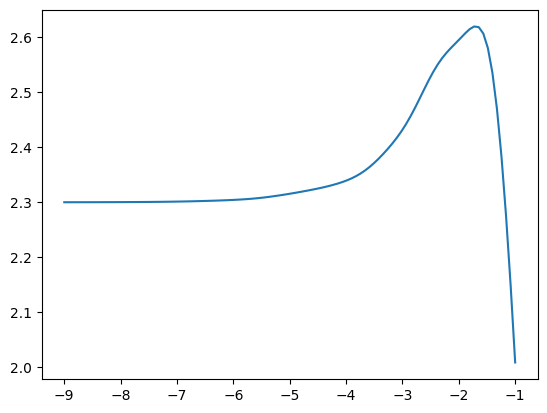

In [16]:
import matplotlib.pyplot as plt

Ps_log = np.linspace(-9, -1, 100)
Ps = 10 ** Ps_log
s, n_opt = np.array([calc(P, lambd=1.2, K=80) for P in Ps]).T
# plt.plot(Ps_log, s)
# plt.plot(Ps_log, n_opt)
# plt.yscale('log')
plt.plot(Ps_log, n_opt / s)
print(n_opt / s)

In [97]:
Ps

array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.32603347e-06, 1.07226722e-05, 1.23284674e-05, 1.41747416e-05,
       1.62975083e-05, 1.87381742e-05, 2.15443469e-05, 2.47707636e-05,
       2.84803587e-05, 3.27454916e-05, 3.76493581e-05, 4.32876128e-05,
       4.97702356e-05, 5.72236766e-05, 6.57933225e-05, 7.56463328e-05,
       8.69749003e-05, 1.00000000e-04, 1.14975700e-04, 1.32194115e-04,
       1.51991108e-04, 1.74752840e-04, 2.00923300e-04, 2.31012970e-04,
       2.65608778e-04, 3.05385551e-04, 3.51119173e-04, 4.03701726e-04,
       4.64158883e-04, 5.33669923e-04, 6.13590727e-04, 7.05480231e-04,
       8.11130831e-04, 9.32603347e-04, 1.07226722e-03, 1.23284674e-03,
       1.41747416e-03, 1.62975083e-03, 1.87381742e-03, 2.15443469e-03,
      

In [103]:
calc(0.02)

(106.23812831275171, 247.86429270255195)

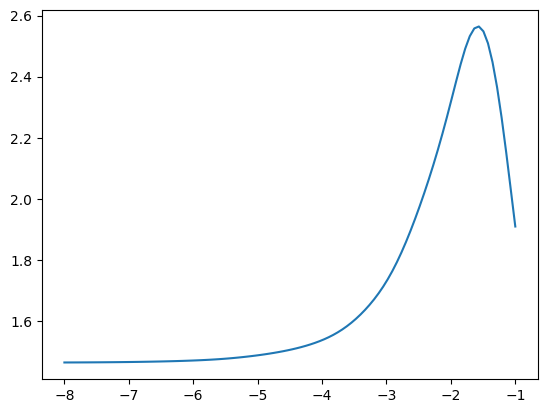

In [116]:
plt.plot(Ps_log, (1 / np.sin(2 * np.arcsin(np.sqrt(Ps)))) / s)